# **Laboratorio Califacado 4 - Vision Computacional**

## Ejercicio 1 - Fine-Tuning de YOLOv8n sobre el dataset BCCD

En clase ya ajustamos YOLOv8n para detectar glóbulos rojos, blancos y plaquetas a partir
del dataset BCCD. Obtuvimos métricas parecidas a las mostradas en la Tabla I. Ahora
profundizaremos en la interpretación y en la mejora de los resultados.


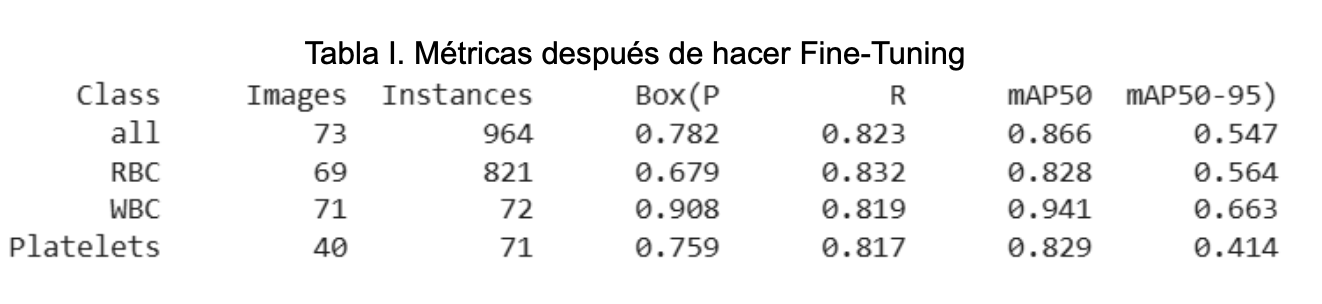

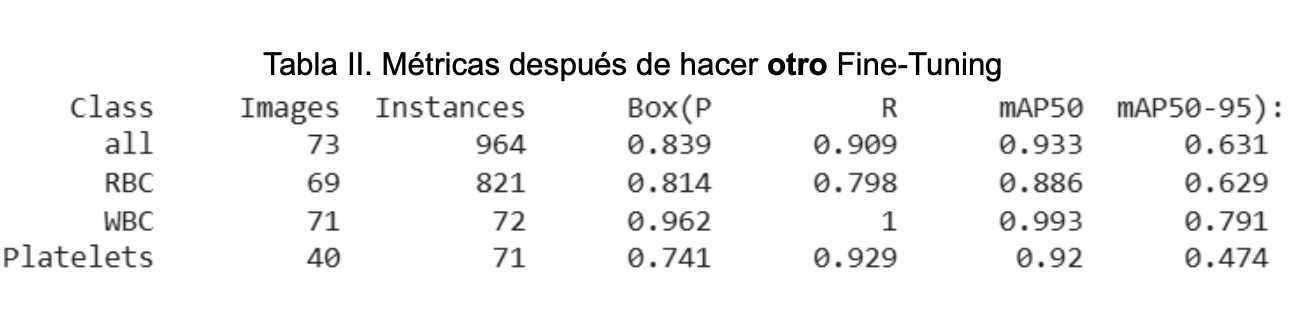

 **1. Explica con tus propias palabras qué representan P (precisión) y R (recall) y
cómo interpretar sus valores en la Tabla I.**

Para la detección de objetos, las métricas Precisión (P) y Recall (R) se definen a partir de los *true positive* (TP), *false positive* (FP) y *false negative* (FN):
- La precisión (P) se define como:  P = TP / (TP + FP); midiendo la proporción de las detecciones que hace el modelo son correctas, por ejemplo, un valor P alto significa pocos falsos positivos (FP).
- El recall (R) se define como: R = TP / (TN + TP); midiendo la proporción de las detecciones que realmente son correctas o pertenecientes a esa clase, un valor R alto implica pocos falsos negativos (FN).

Observando la Tabla I, tenemos que:
- A nivel global (all), el modelo tiene P = 0.782 y R = 0.823, lo que indica una combinación razonablemente equilibrada: la mayoría de las detecciones son correctas y, además, el modelo detecta una gran parte de las clases de manera correcta.
- Para los globulos rojos (RBC), la precisión baja a 0.679, mientras el recall es 0.832. Esto significa que el modelo ve detecta bastantes globolus rojos (buen R), pero comete más falsos positivos en esta clase (P más baja).
- Para los glóbulos blancos (WBC), la precisión es muy alta (P = 0.908) y el recall también es alto (R = 0.819). Aquí el modelo hace pocas detecciones erróneas y, al mismo tiempo, detecta la mayoría de los glóbulos blancos.
- Para las plaquetas (Platelets), se observa P = 0.759 y R = 0.817. El modelo es bastante bueno encontrando plaquetas (R alto) y mantiene una precisión aceptable, aunque no tan alta como en WBC.

 **2. Describe la diferencia entre mAP50 y mAP50-95 y por qué usamos ambos.**

 El mAP (mean Average Precision) es la métrica estándar para evaluar modelos de detección de objetos. Para cada clase se calcula el AP (área bajo la curva Precisión–Recall) y luego se promedian los AP de todas las clases.

 La diferencia entre mAP50 y mAP50-95 está en el umbral de IoU (Intersection over Union) utilizado para decidir si una detección es correcta:
 - mAP50: Calcula el AP usando un umbral fijo de IoU = 0.5. Una predicción se considera correcta si la superposición entre la predicha y lo real es al menos 50 %. Por ende, es un criterio más tolerante en cuanto detección de objetos.
 - mAP50-95: Calcula el AP para múltiples umbrales de IoU, por encima del 0.5, o más común hasta el 0.95, y luego promedia esos valores. Esto exige que los modelos no solo detecten el objeto, sino que además estén bien ajustadas en distintos niveles de exigencia. Por ende, es un criterio más estricto.

**3. Analiza las Tablas I y II y responde: ¿en cuál experimento obtuvimos mejor
desempeño global? Justifica tu elección**

Al comparar los resultados globales de ambos experimentos (all), se observa que el modelo de la Tabla II presenta un desempeño superior al de la Tabla I. En la Tabla I se obtiene una precisión P = 0.782 y un recall R = 0.823, con mAP50 = 0.866 y mAP50-95 = 0.547. En cambio, en la Tabla II estos valores aumentan a P = 0.839 y R = 0.909, mientras que el mAP50 alcanza 0.933 y el mAP50-95 sube hasta 0.631. Es decir, el segundo experimento no solo mejora la proporción de detecciones correctas y la cantidad de instancias detectadas, sino que también incrementa de forma consistente las métricas de precisión promedio, tanto con umbral IoU 0.5 como en el rango más estricto de 0.5 a 0.95.

Si se examinan las clases individuales, se mantiene la misma tendencia: el mAP50-95 de glóbulos rojos (RBC) pasa de 0.564 a 0.629, el de glóbulos blancos (WBC) de 0.663 a 0.791 y el de laquetas (Platelets) de 0.414 a 0.474. Aunque en RBC el recall se reduce ligeramente (de 0.832 a 0.798), esta pequeña caída se ve compensada por un aumento notable en precisión (de 0.679 a 0.814) y por la mejora del mAP50-95, lo que indica un mejor equilibrio detección-localización.

Por ende, el experimento de la Tabla II debe considerarse como el que tuvo mejor desempeño global.

**4. Centrándote solo en la clase Platelets, decide qué experimento es superior
considerando P y R y explica por qué.**

Si se analiza únicamente la clase plaquetas (Platelets), también se aprecia una ventaja clara del experimento de la Tabla II frente al de la Tabla I. En la Tabla I, la precisión y el recall para Platelets son P = 0.759 y R = 0.817, con mAP50 = 0.829 y mAP50-95 = 0.414. En la Tabla II, la precisión baja ligeramente a P = 0.741, pero el recall aumenta de forma importante hasta R = 0.929, mientras que el mAP50 sube a 0.920 y el mAP50-95 mejora a 0.474. Esto significa que el segundo experimento detecta una proporción mayor de plaquetas reales (menos falsos negativos) y, además, las localiza mejor, tal como se refleja en el incremento del mAP50-95, a costa de introducir un pequeño número adicional de falsos positivos.

En un contexto de análisis de imágenes de sangre, donde es preferible no dejar plaquetas sin detectar aunque eso implique algunas detecciones de más, este trade-off resulta favorable. Por tanto, considerando solo la clase plaquetas (Platelets), el modelo correspondiente a la Tabla II es el más conveniente.

## Ejercicio 2 - Fine - Tuning

### 1. Instalación de Ultralytics y Dataset

In [4]:
!pip -q install ultralytics # Instalamos Ultralytics (nos permitirá usar YOLO)

In [10]:
!unzip datasets.zip #Descomprimimos el dataset

Archive:  datasets.zip
   creating: datasets/
  inflating: __MACOSX/._datasets     
  inflating: datasets/.DS_Store      
  inflating: __MACOSX/datasets/._.DS_Store  
   creating: datasets/BCCD/
  inflating: __MACOSX/datasets/._BCCD  
  inflating: datasets/BCCD/.DS_Store  
  inflating: __MACOSX/datasets/BCCD/._.DS_Store  
   creating: datasets/BCCD/images/
  inflating: __MACOSX/datasets/BCCD/._images  
   creating: datasets/BCCD/labels/
  inflating: __MACOSX/datasets/BCCD/._labels  
  inflating: datasets/BCCD/images/.DS_Store  
  inflating: __MACOSX/datasets/BCCD/images/._.DS_Store  
   creating: datasets/BCCD/images/train/
  inflating: __MACOSX/datasets/BCCD/images/._train  
   creating: datasets/BCCD/images/val/
  inflating: __MACOSX/datasets/BCCD/images/._val  
  inflating: datasets/BCCD/labels/.DS_Store  
  inflating: __MACOSX/datasets/BCCD/labels/._.DS_Store  
   creating: datasets/BCCD/labels/train/
  inflating: __MACOSX/datasets/BCCD/labels/._train  
   creating: datasets/BCCD/l

In [6]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2
from pathlib import Path

model_coco = YOLO("yolov8n.pt")          # 80 clases COCO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


usando la imagen de prueba: datasets/BCCD/images/val/BloodImage_00248.jpg

image 1/1 /content/datasets/BCCD/images/val/BloodImage_00248.jpg: 480x640 5 persons, 3 sports balls, 4 bottles, 3 cups, 1 spoon, 1 banana, 4 apples, 2 oranges, 1 carrot, 21 donuts, 6 cakes, 1 dining table, 1 remote, 1 clock, 2 teddy bears, 73.3ms
Speed: 6.9ms preprocess, 73.3ms inference, 26.2ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

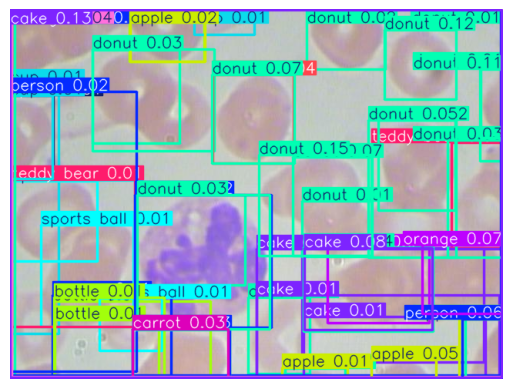

In [11]:
idx = 44
confianza = 0.005

DST     = Path("datasets/BCCD")
test_imgs_list = sorted((DST/"images/val").glob("*.jpg"))
test_img = str(test_imgs_list[idx])
print("usando la imagen de prueba:", test_img)
# pre-entrenado (probablemente no detecta nada)
res0 = model_coco(test_img, conf=confianza)[0]
plt.imshow(cv2.cvtColor(res0.plot(), cv2.COLOR_BGR2RGB)); plt.axis('off')

### Re-entrenemos YOLO para este dataset (Fine-tuning)

#### Modelo base de Fine-Tuning

In [12]:
for (name, p) in model_coco.model.named_parameters():
    print(f"{name:<40} {tuple(p.shape)}  requires_grad={p.requires_grad}")

model.0.conv.weight                      (16, 3, 3, 3)  requires_grad=False
model.0.conv.bias                        (16,)  requires_grad=False
model.1.conv.weight                      (32, 16, 3, 3)  requires_grad=False
model.1.conv.bias                        (32,)  requires_grad=False
model.2.cv1.conv.weight                  (32, 32, 1, 1)  requires_grad=False
model.2.cv1.conv.bias                    (32,)  requires_grad=False
model.2.cv2.conv.weight                  (32, 48, 1, 1)  requires_grad=False
model.2.cv2.conv.bias                    (32,)  requires_grad=False
model.2.m.0.cv1.conv.weight              (16, 16, 3, 3)  requires_grad=False
model.2.m.0.cv1.conv.bias                (16,)  requires_grad=False
model.2.m.0.cv2.conv.weight              (16, 16, 3, 3)  requires_grad=False
model.2.m.0.cv2.conv.bias                (16,)  requires_grad=False
model.3.conv.weight                      (64, 32, 3, 3)  requires_grad=False
model.3.conv.bias                        (64,)  requir

In [39]:
FT_RUN = "bccd_lab4_yolov8n"
EPOCHS = 50

model_ft_lab4 = YOLO("yolov8n.pt")   # reutilizamos base COCO

model_ft_lab4.train(
    data       = "bccd.yaml",
    epochs     = EPOCHS,
    imgsz      = 640,
    batch      = 16,
    name       = FT_RUN,
    patience   = 10,            # early-stopping
    optimizer  = "SGD",
    device     = 0, # "cpu" si ya no quedan creditos
    freeze     = 22,
    project    = "runs/detect",
    val        = True
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bccd.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=22, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bccd_lab4_yolov8n5, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrain

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6bffc03020>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [40]:
metrics = model_ft_lab4.val(data="bccd.yaml", imgsz=640, split="val")
print("mAP@0.5 luego de FT:", metrics.box.map50)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1027.2±289.1 MB/s, size: 19.9 KB)
val: Scanning /content/datasets/BCCD/labels/val.cache... 73 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 73/73 145.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.8it/s 2.8s
                   all         73        964      0.772      0.831      0.867      0.548
                   RBC         69        821      0.656      0.839      0.827      0.564
                   WBC         71         72      0.896      0.838      0.944      0.663
             Platelets         40         71      0.763      0.817       0.83      0.416
Speed: 4.7ms preprocess, 4.1ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /content/runs/detect/val4
mAP@0.5 luego

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = "runs/detect/bccd_lab4_yolov8n/results.csv"
df = pd.read_csv(results_path)

df.head()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,8.71565,1.48776,2.81876,1.53023,0.01195,0.31872,0.22879,0.14388,1.13291,2.24993,1.35256,0.083800,0.001800,0.001800
1,2,13.14210,1.35808,1.89681,1.44698,0.23438,0.38881,0.37850,0.26880,1.06583,2.38274,1.28099,0.066608,0.003608,0.003608
2,3,17.59500,1.33626,1.69850,1.45551,0.02185,0.64791,0.39406,0.26124,1.09647,2.25208,1.29405,0.049323,0.005323,0.005323
3,4,23.42760,1.29827,1.57879,1.43378,0.82645,0.38470,0.52218,0.32704,1.15058,2.01371,1.32831,0.031943,0.006943,0.006943
4,5,27.94170,1.31190,1.52614,1.44365,0.52968,0.37276,0.57541,0.36107,1.17340,1.57743,1.33072,0.014469,0.008469,0.008469


Curva de Perdida

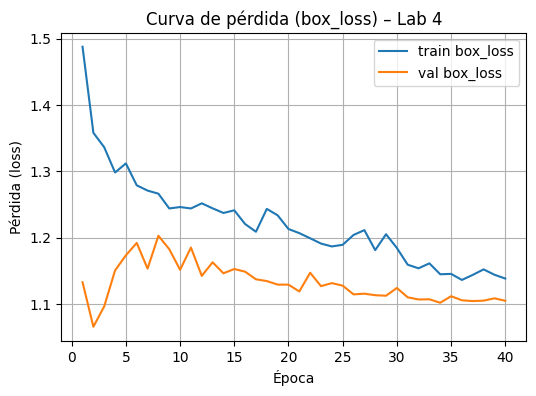

In [34]:
plt.figure(figsize=(6,4))
plt.plot(df["epoch"], df["train/box_loss"], label="train box_loss")
plt.plot(df["epoch"], df["val/box_loss"],   label="val box_loss")
plt.xlabel("Época")
plt.ylabel("Pérdida (loss)")
plt.title("Curva de pérdida (box_loss) – Lab 4")
plt.legend()
plt.grid(True)
plt.show()


Curvas de metricas

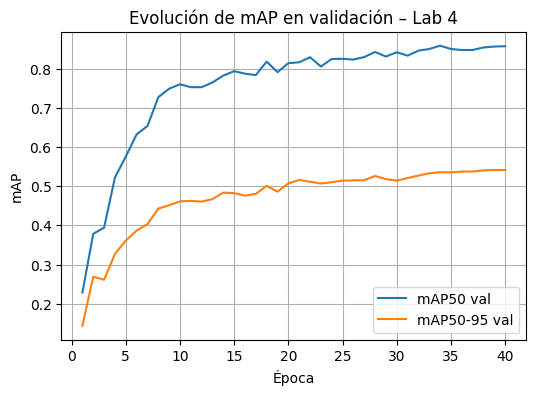

In [35]:
plt.figure(figsize=(6,4))
plt.plot(df["epoch"], df["metrics/mAP50(B)"],      label="mAP50 val")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"],   label="mAP50-95 val")
plt.xlabel("Época")
plt.ylabel("mAP")
plt.title("Evolución de mAP en validación – Lab 4")
plt.legend()
plt.grid(True)
plt.show()


#### Fine tunning con otros parametros, partimos del mejor anterior

In [42]:
model_lab4_b = YOLO("runs/detect/bccd_lab4_yolov8n/weights/best.pt")

In [43]:
tunning_lab4_b = model_lab4_b.train(
    data="bccd.yaml",
    epochs=50,                   # entrenamiento adicional corto
    imgsz=640,
    batch=16,
    optimizer="SGD",             # o el que usó el profe
    lr0=0.001,                   # LR inicial bajo
    lrf=0.001,                   # LR final bajo
    patience=10,
    name="bccd_lab4_tunning",
    project="runs/detect",
    val=True
)


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bccd.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/bccd_lab4_yolov8n/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bccd_lab4_tunning, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspectiv

In [47]:
metrics_2 = model_lab4_b.val(data="bccd.yaml", imgsz=640, split="val")
print("mAP@0.5 luego de FT:", metrics_2.box.map50)


Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 880.3±321.0 MB/s, size: 19.9 KB)
val: Scanning /content/datasets/BCCD/labels/val.cache... 73 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 73/73 149.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.8it/s 2.8s
                   all         73        964      0.847      0.887      0.915      0.626
                   RBC         69        821      0.768      0.815      0.874      0.631
                   WBC         71         72      0.966          1      0.979      0.785
             Platelets         40         71      0.806      0.845      0.893      0.463
Speed: 4.1ms preprocess, 3.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/runs/detect/val5
mAP@0.5 luego 

#### Tercera Corrida de Fine Tuning

In [48]:
model_lab4_c = YOLO("runs/detect/bccd_lab4_tunning/weights/best.pt")

results_lab4_c = model_lab4_c.train(
    data="bccd.yaml",
    epochs=15,                 # pocas épocas extra
    imgsz=640,
    batch=12,
    optimizer="SGD",
    lr0=5e-4,                  # LR aún más bajo
    lrf=5e-4,
    patience=6,
    name="bccd_lab4_final",
    project="runs/detect",
    val=True
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bccd.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.0005, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/bccd_lab4_tunning/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bccd_lab4_final_refine, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=8, pers

In [49]:
metrics_3 = model_lab4_c.val(data="bccd.yaml", imgsz=640, split="val")
print("mAP@0.5 luego de FT:", metrics_3.box.map50)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 883.7±331.2 MB/s, size: 19.9 KB)
val: Scanning /content/datasets/BCCD/labels/val.cache... 73 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 73/73 144.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.7it/s 2.9s
                   all         73        964      0.845      0.893      0.912      0.627
                   RBC         69        821      0.761      0.834      0.879      0.636
                   WBC         71         72      0.965          1      0.974      0.785
             Platelets         40         71      0.808      0.845      0.882      0.461
Speed: 5.4ms preprocess, 4.1ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to /content/runs/detect/val6
mAP@0.5 luego 